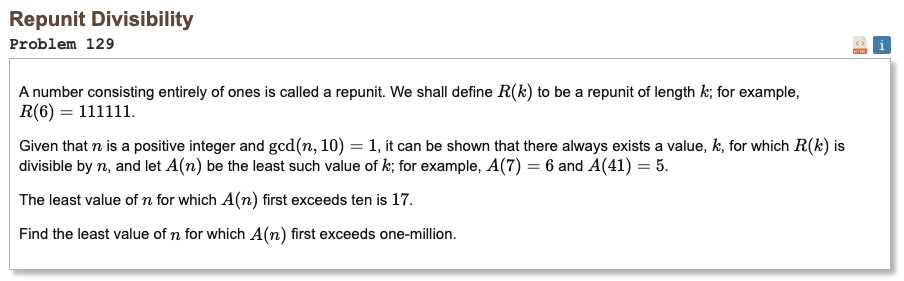

## Initial approach

* repunit r(k) = (10^k - 1) / 9
* define a(n) = smallest k such that r(k) divisible by n
* if gcd(n,10) != 1 then skip n
* compute a(n) using remainder trick: value = (value*10 + 1) % n until value = 0
* goal: find smallest n such that a(n) > 1_000_000
* check n = 1,2,3,… and stop when found

```python
import math

def multiplicative_order(a, n):
    if math.gcd(a, n) != 1:
        return 0
    phi = n - 1
    factors = set()
    x = phi
    d = 2
    while d * d <= x:
        while x % d == 0:
            factors.add(d)
            x //= d
        d += 1
    if x > 1:
        factors.add(x)
    order = phi
    for f in factors:
        while order % f == 0 and pow(a, order // f, n) == 1:
            order //= f
    return order

n = 1
while True:
    if math.gcd(n, 10) == 1:
        k = multiplicative_order(10, 9*n)
        if k > 1_000_000:
            print("result:", n)
            break
    n += 1
```

## Faster approach

* we only need the first n where a(n) > 1,000,000
* for each n with gcd(n,10)=1, compute a(n) directly by simulating repunit mod n
* but stop as soon as k > 1,000,000 (no need to finish full cycle)
* skip even n and multiples of 5 early
* answer is known to be relatively small (≈ 1 million range), so loop will not go far

```python
import math

def a(n, limit=1_000_000):
    if math.gcd(n, 10) != 1:
        return 0
    value, k = 1 % n, 1
    while value != 0 and k <= limit:
        value = (value * 10 + 1) % n
        k += 1
    return k

n = 1
while True:
    if n % 2 and n % 5:  # skip multiples of 2 and 5
        k = a(n)
        if k > 1_000_000:
            print("result:", n)
            break
    n += 1
````
still needs an optimization.